# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

import tensorflow as tf

In [2]:
# your code here

# Load the dataset into DataFrame
df = pd.read_csv("tic-tac-toe.csv")

# Display top5 rows 
df.head()

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True


In [3]:
# Check the shape of the DataFrame
df.shape

(958, 10)

In [4]:
# Convert column names to lowercase
new_cols = []
for col in list(df.columns):
    new_cols.append(col.lower())

# Reassign the new columns names to original DataFrame 
df.columns = new_cols

# Verify changes
df.head()

,tl,tm,tr,ml,mm,mr,bl,bm,br,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True


In [5]:
# Check data types
df.dtypes

tl        str
tm        str
tr        str
ml        str
mm        str
mr        str
bl        str
bm        str
br        str
class    bool
dtype: object

In [6]:
df['class'].value_counts()

class
True     626
False    332
Name: count, dtype: int64

In [7]:
df.tl.value_counts()

tl
x    418
o    335
b    205
Name: count, dtype: int64

In [8]:
# Map class labels to numeric representation
df['class'] = df['class'].map({True: 1, False: 0})

# Convert also the rest DataFrame
df.replace({'x': 1, 'o': -1, 'b': 0}, inplace= True)
df.head()

,tl,tm,tr,ml,mm,mr,bl,bm,br,class
0,1,1,1,1,-1,-1,1,-1,-1,1
1,1,1,1,1,-1,-1,-1,1,-1,1
2,1,1,1,1,-1,-1,-1,-1,1,1
3,1,1,1,1,-1,-1,-1,0,0,1
4,1,1,1,1,-1,-1,0,-1,0,1


In [9]:
# Confirm data type changed
df.dtypes

tl       object
tm       object
tr       object
ml       object
mm       object
mr       object
bl       object
bm       object
br       object
class     int64
dtype: object

In [10]:
# Convert data tpyes of numeric values
df = df.astype(int)

df.dtypes

tl       int64
tm       int64
tr       int64
ml       int64
mm       int64
mr       int64
bl       int64
bm       int64
br       int64
class    int64
dtype: object

## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

In [11]:
# your code here
from sklearn.model_selection import train_test_split

# Separate features and target column
X = df.drop("class", axis=1)
y = df["class"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state= 42)

print("Train Dataset Shape")
print("X_train:", X_train.shape )
print("y_train:", y_train.shape)

print("\nTest Dataset Shape")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Train Dataset Shape
X_train: (766, 9)
y_train: (766,)

Test Dataset Shape
X_test: (192, 9)
y_test: (192,)


In [12]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout

# Define model sequential
model = Sequential([
    Input(shape=(9,)),
    Dense(16, activation='relu'),
    # Dropout(0.2),
    Dense(32, activation='relu'),
    # Dropout(0.2),
    Dense(2, activation='softmax')
])
# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 770 (3.01 KB)

 Trainable params: 770 (3.01 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Compile model 
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Fit the model and set epochs 20
model_history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2)

Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4967 - loss: 0.7157 - val_accuracy: 0.6623 - val_loss: 0.6455
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6438 - loss: 0.6504 - val_accuracy: 0.6818 - val_loss: 0.6141
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6618 - loss: 0.6208 - val_accuracy: 0.6948 - val_loss: 0.5966
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6830 - loss: 0.5955 - val_accuracy: 0.7143 - val_loss: 0.5806
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7288 - loss: 0.5708 - val_accuracy: 0.7532 - val_loss: 0.5648
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7369 - loss: 0.5450 - val_accuracy: 0.8052 - val_loss: 0.5492
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7435 - loss: 0.5220 - val_accuracy: 0.7922 - val_loss: 0.5343
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7663 - loss: 0.4983 - val_accuracy: 0.7922 - val_loss:

In [14]:
# Evaluate Model

model_score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', model_score[0])
print('Test accuracy:', model_score[1])

Test loss: 0.27283042669296265
Test accuracy: 0.8958333134651184


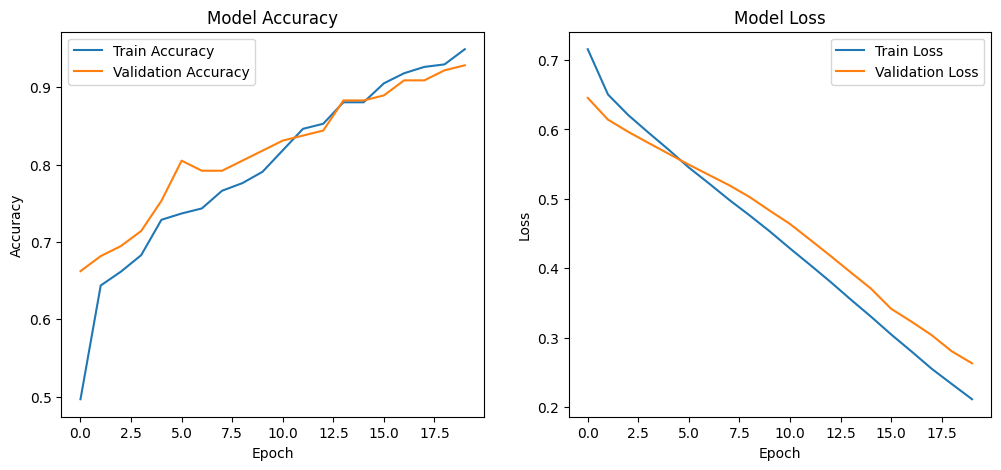

In [15]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(model_history.history['accuracy'], label='Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss'], label='Train Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [16]:
# Save the base model
model.save('tic-tac-toe-model.keras')

## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [17]:
# your code here

tic_tac_toe_model = tf.keras.models.load_model('tic-tac-toe-model.keras')
predictions = tic_tac_toe_model(X_test)
print(np.argmax(predictions[7]))

1


In [18]:
predictions
# This will display prediction for both 
# the class labels '0'and '1'
# '0' means 

<tf.Tensor: shape=(192, 2), dtype=float32, numpy=
array([[0.02961857, 0.97038144],
       [0.17096694, 0.829033  ],
       [0.06182448, 0.9381755 ],
       [0.46189907, 0.5381009 ],
       [0.90010124, 0.09989878],
       [0.02006245, 0.9799375 ],
       [0.13399312, 0.8660069 ],
       [0.27081034, 0.72918963],
       [0.03397156, 0.9660284 ],
       [0.8817211 , 0.11827893],
       [0.01806778, 0.9819323 ],
       [0.16617538, 0.8338247 ],
       [0.07085847, 0.92914146],
       [0.65063876, 0.34936124],
       [0.1196949 , 0.8803051 ],
       [0.02384108, 0.9761589 ],
       [0.2258236 , 0.7741764 ],
       [0.11557681, 0.8844232 ],
       [0.91301733, 0.08698267],
       [0.7278438 , 0.27215615],
       [0.30650932, 0.69349074],
       [0.19825077, 0.80174917],
       [0.43671307, 0.5632869 ],
       [0.01059743, 0.98940253],
       [0.91125697, 0.08874301],
       [0.09673178, 0.9032683 ],
       [0.03717138, 0.96282864],
       [0.17255765, 0.82744235],
       [0.21999171, 0.7800

In [19]:
# Confirm prediction output 
print(X_test.iloc[7])
print(y_test.iloc[7])

tl   -1
tm    1
tr   -1
ml   -1
mm   -1
mr    1
bl    1
bm    1
br    1
Name: 334, dtype: int64
1


## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

In [20]:
# your code here

# Add new layer
# Check how does new model performs

new_model = Sequential([
    Input(shape=(9,)),
    Dense(16, activation='relu'),
    # Dropout(0.2),
    Dense(32, activation='relu'),
    # Dropout(0.2),
    Dense(16, activation='relu'),               # Add new layer
    # Dropout(0.2),
    Dense(2, activation='softmax')
])

print(new_model.summary())

new_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history1 = new_model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2)

score = new_model.evaluate(X_test, y_test, verbose=0)

print("\n")
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,266 (4.95 KB)

 Trainable params: 1,266 (4.95 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5637 - loss: 0.6793 - val_accuracy: 0.5844 - val_loss: 0.6400
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6307 - loss: 0.6088 - val_accuracy: 0.6299 - val_loss: 0.6210
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6748 - loss: 0.5795 - val_accuracy: 0.6558 - val_loss: 0.6111
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7042 - loss: 0.5533 - val_accuracy: 0.6948 - val_loss: 0.6042
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7582 - loss: 0.5183 - val_accuracy: 0.7208 - val_loss: 0.5816
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7778 - loss: 0.4847 - val_accuracy: 0.7013 - val_loss: 0.5626
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7974 - loss: 0.4465 - val_accuracy: 0.7078 - val_loss: 0.5459
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8284 - loss: 0.4096 - val_accuracy: 0.7143 - val_

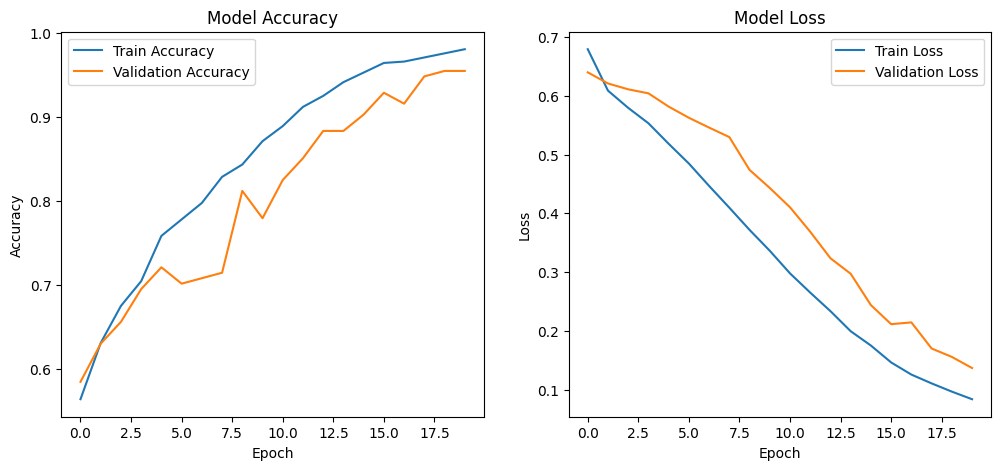

In [21]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [22]:
# This time we will change the number of epochs
# Set epochs from 20 to 50
new_model_1 = Sequential([
    Input(shape=(9,)),
    Dense(16, activation='relu'),
    # Dropout(0.2),
    Dense(32, activation='relu'),
    # Dropout(0.2),
    Dense(16, activation='relu'),               
    # Dropout(0.2),
    Dense(2, activation='softmax')
])

print(new_model_1.summary())

new_model_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history1 = new_model_1.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)            # set epochs= 50

score = new_model_1.evaluate(X_test, y_test, verbose=0)

print("\n")
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 16)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,266 (4.95 KB)

 Trainable params: 1,266 (4.95 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6258 - loss: 0.6343 - val_accuracy: 0.6883 - val_loss: 0.6072
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6536 - loss: 0.5945 - val_accuracy: 0.6818 - val_loss: 0.5876
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6814 - loss: 0.5702 - val_accuracy: 0.7338 - val_loss: 0.5758
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7173 - loss: 0.5467 - val_accuracy: 0.7532 - val_loss: 0.5621
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7500 - loss: 0.5235 - val_accuracy: 0.7532 - val_loss: 0.5466
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7582 - loss: 0.4993 - val_accuracy: 0.7532 - val_loss: 0.5251
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7859 - loss: 0.4677 - val_accuracy: 0.7727 - val_loss: 0.5036
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7974 - loss: 0.4394 - val_accuracy: 0.7727 - val_

- Yes, with adding new layer and increasing epochs model performed extemely well and it generlise well.

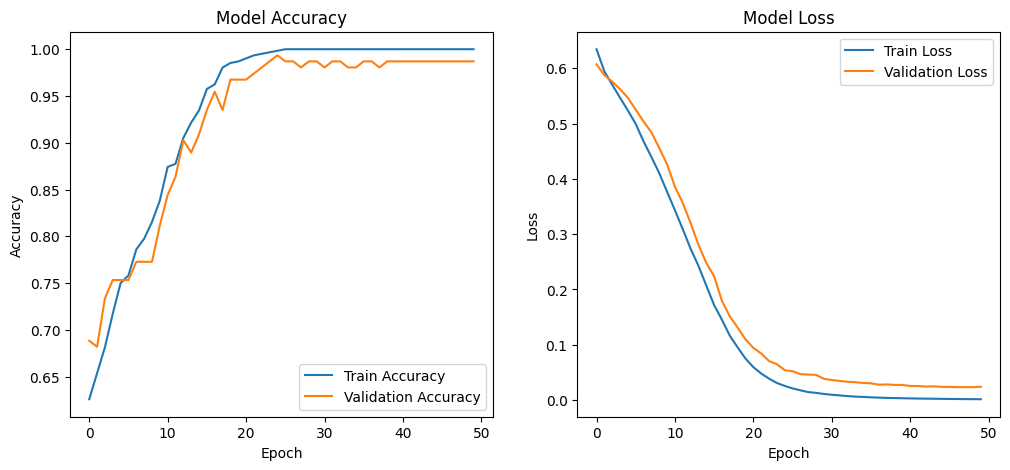

In [23]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Learning Rate**

In [24]:
from keras.optimizers import Adam

model_learning_rate = Sequential()

model_learning_rate = Sequential([
    Input(shape=(9,)),
    Dense(16, activation='relu'),
    # Dropout(0.2),
    Dense(32, activation='relu'),
    # Dropout(0.2),
    Dense(2, activation='softmax')
])

optimizer = Adam(learning_rate=0.01)

model_learning_rate.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model_learning_rate.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2)

score = model_learning_rate.evaluate(X_test, y_test, verbose=0)

print("\n")
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7092 - loss: 0.5881 - val_accuracy: 0.7597 - val_loss: 0.5505
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7794 - loss: 0.4676 - val_accuracy: 0.8182 - val_loss: 0.4062
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8693 - loss: 0.3178 - val_accuracy: 0.9221 - val_loss: 0.2633
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9428 - loss: 0.1812 - val_accuracy: 0.9416 - val_loss: 0.1902
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9739 - loss: 0.1079 - val_accuracy: 0.9610 - val_loss: 0.1108
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9886 - loss: 0.0544 - val_accuracy: 0.9740 - val_loss: 0.1130
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9935 - loss: 0.0345 - val_accuracy: 0.9675 - val_loss: 0.0951
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9902 - loss: 0.0413 - val_accuracy: 0.9870 - val_loss:

**Which approach(es) did you find helpful to improve your model performance?**

| Case  | Architecture     | Learning Rate | Epochs | Train Accuracy | Val Accuracy | Test Accuracy | Test Loss |
| ----- | ---------------- | ------------- | ------ | -------------- | ------------ | ------------- | --------- |
| **1** | 16 → 32 → 2      | 0.001         | 20     | 95.92%         | 90.91%       | 90.63%        | 0.216     |
| **2** | 16 → 32 → 16 → 2 | 0.001         | 20     | 99.35%         | 97.40%       | 95.31%        | 0.137     |
| **3** | 16 → 32 → 16 → 2 | 0.001         | 50     | 100%           | 99.35%       | 97.40%        | 0.099     |
| **4** | 16 → 32 → 2      | 0.01          | 20     | 100%           | 98.70%       | 97.40%        | 0.104     |

So, I can conclude that these are some useful ways to improce model performance.

**Add a new layer**
- Increasing model capacity improved both validation and test accuracy. A deeper architecture allowed the model to learn more complex patterns

**Number of epochs**
- Training the model for more epochs helped it improve further when it was still learning.

**Learning Rate**
- A slightly higher learning rate helped the model learn faster and reach good accuracy in fewer epochs.